In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
def kmeans(data, k):
    [m, n] = data.shape
    labels = np.zeros(n)
    sse_seq = []
    mul_data = np.tile(data, [k,1,1])
    centers = np.random.randn(k,m)
    while True:
        mul_centers = np.transpose(np.tile(centers, [n,1,1]), (1,2,0)) # (k, m) -> (n, k, m)  -> (k, m, n)
        distances = np.linalg.norm(mul_data - mul_centers, axis=1) # (k,n). 2 is L2-norm, 1 is first dimension.
        label_new = np.argmin(distances, axis=0) # length n
        if not (label_new - labels).any():
            break;
        labels = label_new
        sse = 0
        for ks in range(k):
            data_k = data[:,label_new==ks]
            centers[ks,:] = np.mean(data_k, axis=1)
            sse += np.sum(np.linalg.norm(data_k - centers[ks:(ks+1),:].T)**2)
        sse_seq.append(sse)
    return labels + 1, sse_seq # labels are originally 0~4, we should set it as 1~5

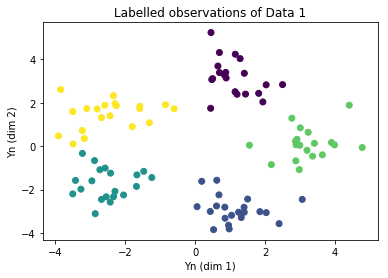

In [12]:
data = sio.loadmat("hw7_1_data1.mat")["Yn"]
name = "Data 1"
k = 5

np.random.seed(1028)
labels, sse_seq = kmeans(data, k)

scatter = plt.scatter(data[0,:], data[1,:], c=labels)
plt.title('Labelled observations of {}'.format(name))
plt.xlabel('Yn (dim 1)')
plt.ylabel('Yn (dim 2)')
plt.savefig("p1_data1_scatter_py.png")
plt.show()

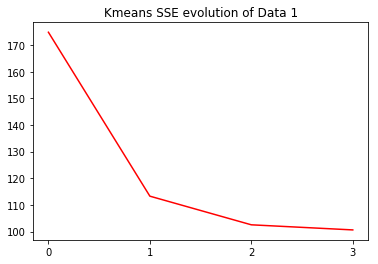

In [13]:
plt.plot(sse_seq, color="red")
plt.title("Kmeans SSE evolution of {}".format(name))
plt.xticks(list(range(len(sse_seq))))
plt.savefig("p1_data1_sse_py.png")
plt.show()

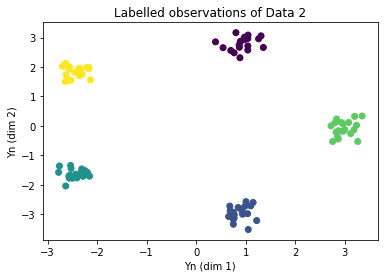

In [14]:
data = sio.loadmat("hw7_1_data2.mat")["Yn"]
name = "Data 2"
k = 5

np.random.seed(1028)
labels, sse_seq = kmeans(data, k)

scatter = plt.scatter(data[0,:], data[1,:], c=labels)
plt.title('Labelled observations of {}'.format(name))
plt.xlabel('Yn (dim 1)')
plt.ylabel('Yn (dim 2)')
plt.savefig("p1_data2_scatter_py.png")
plt.show()

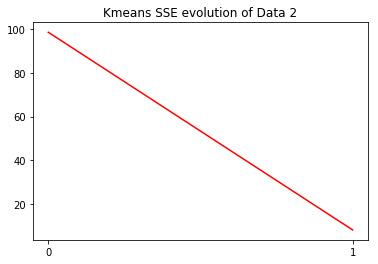

In [15]:
plt.plot(sse_seq, color="red")
plt.title("Kmeans SSE evolution of {}".format(name))
plt.xticks(list(range(len(sse_seq))))
plt.savefig("p1_data2_sse_py.png")
plt.show()